# People Analytics

## Objective

* Menentukan faktor yang mempengaruhi job satisfaction (rating 1-5).
* Mengetahui karakteristik karyawan dengan tingkat kepuasan tinggi (4-5) dan rendah (1-3).



## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Access to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


data_path = '/content/drive/My Drive/Assignment People Analytics/'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Read Data

In [ ]:
Assignment_People_Analyticsfile_name = data_path + 'assignment_employee_survey.csv'

df_employee = pd.read_csv(Assignment_People_Analyticsfile_name)

df_employee.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.50,2,1,7.60,Car,20,3,12,0,Bachelor,True,33.50,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.80,2,2,7.90,Car,15,4,11,0,Bachelor,False,36.00,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.10,5,4,6.50,Motorbike,17,0,30,0,Bachelor,True,10.50,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.90,3,1,7.50,Public Transport,13,2,9,0,Bachelor,True,23.00,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,1.40,4,2,6.20,Car,8,3,13,0,Bachelor,False,35.00,5


Dictionary:

* emp_id :	Employee ID (Unique Identifier)
* gender : Gender of the employee (e.g., Male, Female)
* age	:	Age of the employee
* marital_status :	Marital status (e.g., Married, Single, Divorced)
* job_level	: Job level (e.g., Mid, Junior, Senior, Lead)
* experience	:	Years of experience in the industry
* dept	:	Department (e.g., IT, Finance, Marketing)
* emp_type	:	Employment type (e.g., Full-Time, Contract, Part-Time)
* wlb	:	Work-life balance rating (1-5)
* work_env	:	Work environment satisfaction (1-5)
* physical_activity_hours	:	Average physical activity hours per week
* workload	: Workload perception (1-5)
* stress	:	Stress level (1-5)
* sleep_hours	:	Average sleep hours per night
* commute_mode	:	Mode of commute (e.g., Car, Public Transport, Walk)
* commute_distance	:	Distance to workplace (in km)
* num_companies	:	Number of companies worked at before
* team_size	:	Number of team members
* num_reports	:	Number of direct reports (if any)
* edu_level	:	Education level (e.g., Bachelor, Master, PhD)
* have_ot	:	Whether the employee does overtime (True/False)
* training_hours_per_year	:	Training hours per year
* job_satisfaction	:	Job satisfaction level (1-5)



## Data Understanding

Inspect if there is any NULL in the data.

In [ ]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

## Exploratory Data Analysis


###Check Missing Value

In [ ]:
df_employee.isnull().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


###Check Outlier

Melihat Outlier pada Kolom numerik yang akan dilakukan analisis

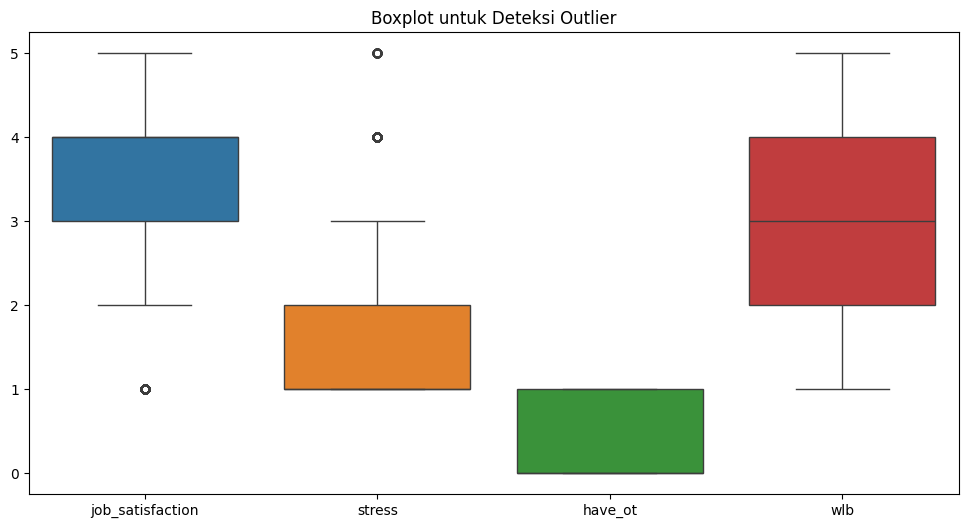

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_employee[['job_satisfaction', 'stress', 'have_ot', 'wlb']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()


Outlier dalam data ini mencerminkan realitas, bukan error jadi tidak perlu dilakukan handling outlier

### Matrix Corelation


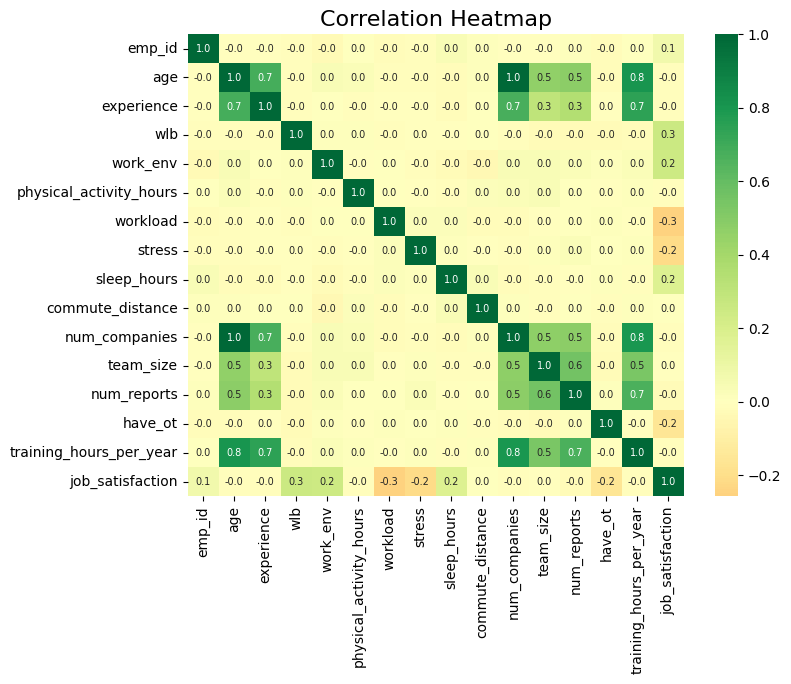

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_employee.select_dtypes(exclude='object').corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            cmap='RdYlGn',
            center=0,
            fmt=".1f",
            annot=True,
            annot_kws={"fontsize": 7},
            )

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### 1. Apakah ada korelasi antara job satisfaction dan work-life balance (wlb)?

Analisis: Boxplot untuk melihat distribusi job satisfaction per WLB level.

In [ ]:
# 1. Job Satisfaction vs Work-Life Balance
js_vs_wlb = pd.crosstab(index=df_employee['wlb'],
                        columns=df_employee['job_satisfaction'],
                        normalize='index') * 100
print("Job Satisfaction vs Work-Life Balance:\n", js_vs_wlb, "\n")

Job Satisfaction vs Work-Life Balance:
 job_satisfaction     1     2     3     4     5
wlb                                           
1                28.00  5.91 23.13 33.39  9.57
2                20.12 11.16 18.13 36.45 14.14
3                11.24 10.45 21.10 41.22 15.98
4                 7.83  8.70 18.43 43.65 21.39
5                 3.95 10.05 13.51 48.11 24.38 



<ipython-input-88-f268b54b1a67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employee, x="wlb", y="job_satisfaction", palette="viridis")


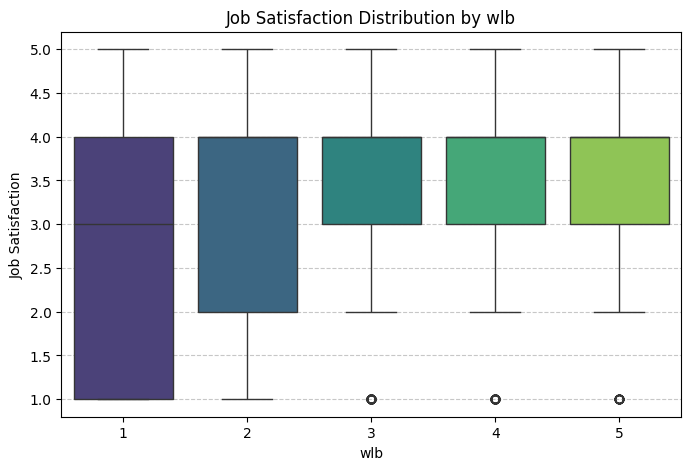

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_employee, x="wlb", y="job_satisfaction", palette="viridis")
plt.title("Job Satisfaction Distribution by wlb")
plt.xlabel("wlb")
plt.ylabel("Job Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- Jika dilihat pada matrix korelasi bahwa hubungan antara work life balance dengan job satisfaction yaitu 0.3 artinya Ada korelasi positif lemah-moderat, work-life balance memang berpengaruh pada kepuasan kerja, tetapi bukan satu-satunya faktor utama
- Pada Boxlot menunjukan bahwa karyawan yang memiliki work life balance tinggi cenderung lebih puas.
- Perusahaan bisa meningkatkan fleksibilitas kerja atau kebijakan WFH/hybrid untuk meningkatkan kepuasan karyawan

Rekomendasi :
- Implementasi kebijakan fleksibilitas kerja (work from home/hybrid).
- Pengurangan jam kerja lembur untuk meningkatkan keseimbangan hidup-kerja.
- Program kesejahteraan karyawan seperti wellness programs atau mental health support.


###2. Bagaimana pengaruh job level terhadap kepuasan kerja?

Analisis: Boxplot untuk melihat distribusi job satisfaction per job_level.


In [ ]:
# 2. Job Satisfaction vs Job Level
js_vs_job_level = pd.crosstab(index=df_employee['job_level'],
                              columns=df_employee['job_satisfaction'],
                              normalize='index') * 100

print("Job Satisfaction vs Job Level:\n", js_vs_job_level, "\n")

Job Satisfaction vs Job Level:
 job_satisfaction     1     2     3     4     5
job_level                                     
Intern/Fresher   13.59  9.78 17.93 44.02 14.67
Junior           14.72  8.44 19.75 39.14 17.95
Lead             18.00  6.86 16.86 42.86 15.43
Mid              12.79  9.05 19.25 41.81 17.10
Senior           13.18 10.42 18.69 39.53 18.18 



<ipython-input-96-5c96fb00897d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employee, x="job_level", y="job_satisfaction", palette="viridis")


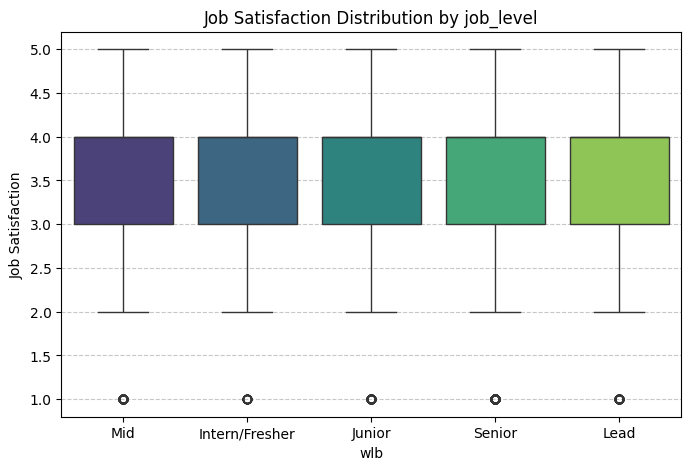

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_employee, x="job_level", y="job_satisfaction", palette="viridis")
plt.title("Job Satisfaction Distribution by job_level")
plt.xlabel("wlb")
plt.ylabel("Job Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- Dari tabel crosstab, mayoritas karyawan di semua level memiliki rating Job Satisfaction di kisaran 3–4.
- Persentase karyawan dengan rating 5 (sangat puas) relatif rendah di semua level, berkisar antara 14%–18%.
- Lead level memiliki distribusi kepuasan yang lebih rendah dibanding level lain, dengan 18% karyawan memberikan rating 1 dan hanya 15.43% memberikan rating 5.
- Intern/Fresher dan Mid-level memiliki persentase tertinggi untuk rating 4, sekitar 44% dan 41.81% masing-masing, menunjukkan tingkat kepuasan lebih tinggi dibanding level lain.

Boxplot:
  - Distribusi job satisfaction hampir merata di semua level pekerjaan.
  - Tidak ada perbedaan signifikan dalam rentang job satisfaction antar level, yang terlihat dari kemiripan bentuk boxplot di semua kategori.
  - Terdapat outlier pada rating 1 di semua job levels, yang bisa mengindikasikan bahwa ada beberapa karyawan di semua level yang sangat tidak puas.

Rekomendasi :
- Bisa dilakukan survei atau wawancara untuk mengidentifikasi penyebab utama ketidakpuasan, apakah terkait beban kerja, manajemen, atau faktor lainnya.
- Meskipun distribusi serupa, kebutuhan dan ekspektasi di tiap level bisa berbeda. Misalnya, Intern/Fresher mungkin membutuhkan lebih banyak pelatihan, sementara Senior dan Lead mungkin lebih memperhatikan pengakuan atas kontribusi mereka. Rancang strategi peningkatan kepuasan kerja berdasarkan kebutuhan spesifik tiap job level.


### 3. Bagaimana hubungan antara tingkat stress dan kepuasan kerja?

Analisis: Scatter plot atau heatmap korelasi antara stress dan job_satisfaction.

In [ ]:
# 3. Job Satisfaction vs Stress Level
js_vs_stress = pd.crosstab(index=df_employee['stress'],
                           columns=df_employee['job_satisfaction'],
                           normalize='index') * 100

print("Job Satisfaction vs Stress Level:\n", js_vs_stress, "\n")

Job Satisfaction vs Stress Level:
 job_satisfaction     1     2     3     4     5
stress                                        
1                 9.84  8.70 16.43 45.89 19.14
2                12.01 10.56 21.74 38.72 16.98
3                22.78 11.39 21.52 30.38 13.92
4                30.86  6.17 22.84 30.25  9.88
5                38.57  5.71 28.57 15.71 11.43 



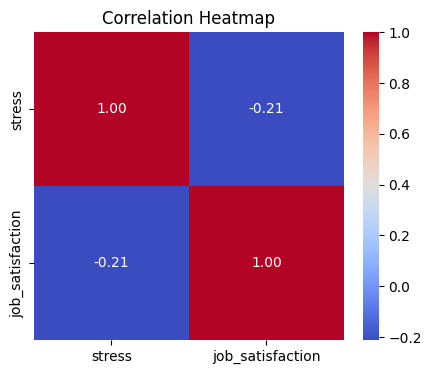

In [ ]:
#Heatmap korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(df_employee[["stress", "job_satisfaction"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-62-01c53fd76f4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employee, x="stress", y="job_satisfaction", palette="viridis")


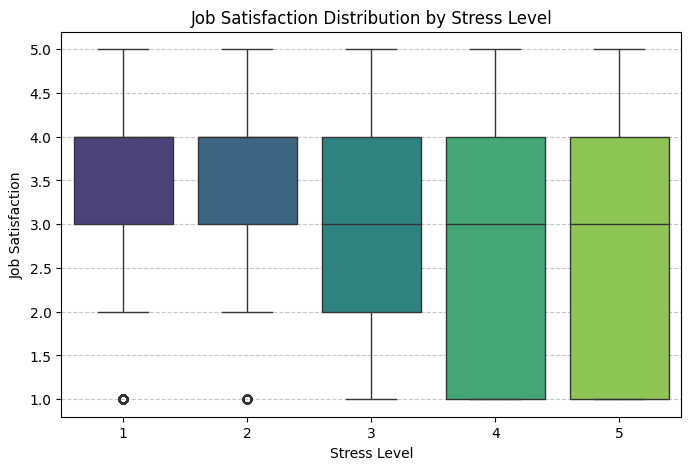

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_employee, x="stress", y="job_satisfaction", palette="viridis")
plt.title("Job Satisfaction Distribution by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Job Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- Korelasi negatif menunjukkan bahwa semakin tinggi stress, semakin rendah kepuasan kerja, meskipun hubungan ini tidak terlalu kuat (korelasi di bawah 0.3)
Semakin tinggi tingkat stres, semakin besar variasi kepuasan kerja.
-Median job satisfaction lebih rendah pada stress level 3-5 dibandingkan dengan level 1-2.
-Pada stress level 4 dan 5, job satisfaction cenderung lebih tersebar dengan banyak karyawan memiliki kepuasan rendah (≤2).
-Ada beberapa outlier di stress level 1 dan 2, menunjukkan bahwa tidak semua karyawan dengan stres rendah memiliki kepuasan tinggi.

Rekomendasi :
- Karyawan dengan tingkat stres tinggi (level 4-5) memiliki variasi job satisfaction yang lebih besar, menunjukkan bahwa beberapa masih bisa merasa puas meskipun stres.
- Perusahaan dapat menerapkan kebijakan work-life balance yang lebih baik, seperti jam kerja fleksibel atau batasan overtime.
- Pelatihan manajemen stres, mindfulness, atau akses ke layanan konseling dapat membantu mengurangi dampak stres pada kepuasan kerja.
- Program seperti employee assistance programs (EAP) atau aktivitas tim yang menyenangkan dapat membantu menyeimbangkan tekanan kerja.


### 4. Bagaimana commute mode mempengaruhi job satisfaction?
Analisis: Boxplot atau violin plot untuk commute_distance per kategori job satisfaction.

In [ ]:
# 4. Job Satisfaction vs Commute Mode
js_vs_commute = pd.crosstab(index=df_employee['commute_mode'],
                            columns=df_employee['job_satisfaction'],
                            normalize='index') * 100

print("Job Satisfaction vs Commute Mode:\n", js_vs_commute, "\n")

Job Satisfaction vs Commute Mode:
 job_satisfaction     1     2     3     4     5
commute_mode                                  
Bike             15.50  8.75 19.00 39.75 17.00
Car              12.42  8.82 18.54 42.48 17.74
Motorbike        12.80  7.96 17.30 46.37 15.57
Public Transport 15.17  9.83 20.52 37.94 16.54
Walk             15.64 10.55 15.64 38.18 20.00 



<ipython-input-100-4c990daa7f7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employee, x="commute_mode", y="job_satisfaction", palette="viridis")


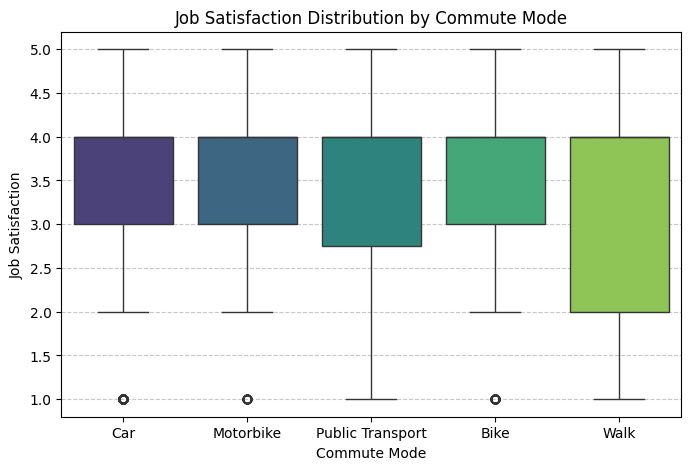

In [ ]:
### 4. Job Satisfaction vs Commute Mode (Boxplot) ###
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_employee, x="commute_mode", y="job_satisfaction", palette="viridis")
plt.title("Job Satisfaction Distribution by Commute Mode")
plt.xlabel("Commute Mode")
plt.ylabel("Job Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- Rata-rata job satisfaction cukup serupa untuk semua moda transportasi.
Karyawan yang berjalan kaki (walk) memiliki distribusi job satisfaction yang lebih lebar, artinya ada variasi yang cukup besar dalam tingkat kepuasan mereka.
-Moda transportasi lain (car, motorbike, public transport, bike) memiliki distribusi job satisfaction yang relatif mirip, dengan mayoritas berkisar di sekitar nilai 3-4.
-Ada beberapa outlier di semua moda transportasi, menunjukkan bahwa ada sebagian kecil karyawan yang memiliki kepuasan kerja sangat rendah meskipun moda transportasi mereka sama dengan mayoritas lainnya.
-Tidak ada perbedaan signifikan yang terlihat antara satu moda transportasi dengan yang lain. Ini menunjukkan bahwa moda transportasi sendiri mungkin bukan faktor utama yang mempengaruhi job satisfaction, tetapi bisa berhubungan dengan faktor lain seperti durasi perjalanan, kenyamanan, atau kondisi lalu lintas

Rekomendasi :
- Jika karyawan menggunakan kendaraan pribadi (mobil/motor), perusahaan dapat menyediakan subsidi bahan bakar atau parkir gratis untuk mengurangi beban biaya transportasi mereka.
- Jika banyak karyawan menggunakan transportasi umum, perusahaan bisa bekerja sama dengan penyedia layanan transportasi untuk subsidi tiket atau menyediakan shuttle bus ke kantor.
- Jika kemacetan lalu lintas berdampak pada stres dan kepuasan kerja, perusahaan bisa menerapkan jam kerja fleksibel atau opsi kerja hybrid untuk mengurangi tekanan perjalanan.



### 5. Apakah overtime berhubungan dengan job satisfaction?

Analisis: heatmap dan boxplot


In [ ]:
#Job Satisfaction vs Overtime
js_vs_overtime = pd.crosstab(index=df_employee['have_ot'],
                             columns=df_employee['job_satisfaction'],
                             normalize='index') * 100

print("Job Satisfaction vs Overtime:\n", js_vs_overtime, "\n")

Job Satisfaction vs Overtime:
 job_satisfaction     1    2     3     4     5
have_ot                                      
False            10.68 9.58 16.58 44.11 19.05
True             21.36 8.31 23.56 33.37 13.39 



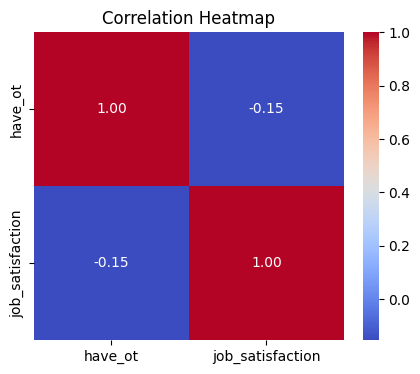

In [ ]:
#Heatmap korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(df_employee[["have_ot", "job_satisfaction"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-106-01d9626c40d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employee, x="have_ot", y="job_satisfaction", palette="viridis")


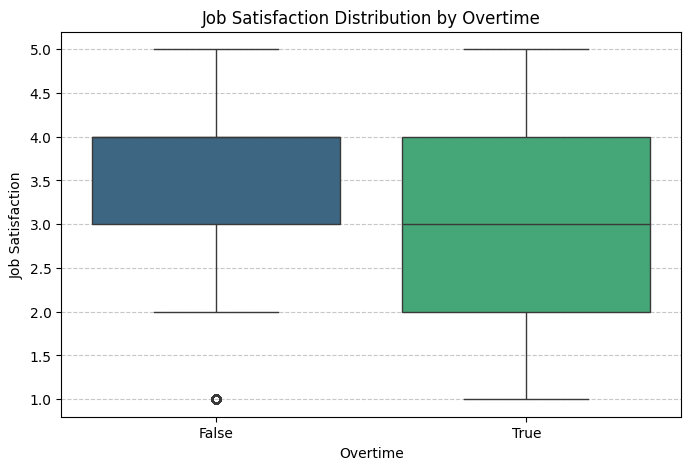

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_employee, x="have_ot", y="job_satisfaction", palette="viridis")
plt.title("Job Satisfaction Distribution by Overtime")
plt.xlabel("Overtime")
plt.ylabel("Job Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- Korelasi antara overtime (have_ot) dan job satisfaction adalah -0.15, yang menunjukkan hubungan negatif yang lemah.
- Artinya, overtime sedikit berkorelasi dengan kepuasan kerja yang lebih rendah, tetapi pengaruhnya tidak terlalu besar.
- Median job satisfaction untuk karyawan yang overtime lebih rendah dibandingkan yang tidak overtime.
- Distribusi job satisfaction untuk karyawan yang overtime lebih luas, menunjukkan variasi yang lebih besar dalam kepuasan kerja.
- Ada outlier di job satisfaction rendah pada kelompok yang tidak overtime, yang bisa jadi karena faktor lain selain overtime.

Rekomendasi :
- Berikan kompensasi tambahan atau cuti pengganti untuk menjaga kepuasan kerja tetap tinggi.
- Survei reguler untuk mengukur dampak overtime terhadap kesejahteraan karyawan.
- Jika overtime terus meningkat dan kepuasan kerja turun, evaluasi ulang kebijakan kerja.

